# Applying transformations on a path or canvas: Drawing an ellipse

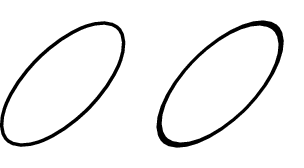

In [1]:
from pyx import *

c = canvas.canvas()
circ = path.circle(0, 0, 1)

# variant 1: use trafo as a deformer
c.stroke(circ, [style.linewidth.THIck, 
                trafo.scale(sx=2, sy=0.9), trafo.rotate(45), trafo.translate(1, 0)])

# variant 2: transform a subcanvas
sc = canvas.canvas()
sc.stroke(circ, [style.linewidth.THIck])
c.insert(sc, [trafo.scale(sx=2, sy=0.9), trafo.rotate(45), trafo.translate(5, 0)])

c

PyX does not directly provide a path corresponding to an ellipse. This example
shows two ways how to draw an ellipse using affine transformations. 

In order to create an ellipse, we best start from a unit circle centered around
the point of origin of the coordinate system (here: `circ`). In variant 1, we
tell PyX to apply a couple of affine transformations before stroking this
circle on the canvas `c`. These affine transformations are contained in the
`trafo` module. We first use `trafo.scale` to apply a non-uniform scaling,
namely by a factor of 2 in x-direction and a factor of 0.9 in y-direction.
Doing so, we define the two principle axes of the ellipse. In a next step, we
rotate with `trafo.rotate` the ellipse by an angle of 45 degrees in the
mathematical positive direction, i.e. counter-clockwise. Last, we shift the
origin of the ellipse to the desired point by applying a `trafo.translate`
operation.

<img src="http://pyx.sourceforge.net/bend.png" align="left"> Note that the order of the transformations matters. If you, for instance, would
first translate the ellipse, the later scaling would also affect the distance
by which you have shifted the ellipse. PyX applies the transformations one after
the other, from left to right, so the example shown above does the correct thing.

<img src="http://pyx.sourceforge.net/bend.png" align="left"> You can also treat transformations as mathematical objects (they are
represented by two-dimensional matrices together with an offset vector) and
multiply them using the `*` operator. Note, however, that mathematically,
transformations are applied from right to left, such that variant 1
would need to be written as

    c.stroke(circ, [trafo.translate(1,0) * trafo.rotate(45) * trafo.scale(sx=2, sy=1.5)])

<img src="http://pyx.sourceforge.net/bend.png" align="left"> PyX also provides some convenience methods for applying certain
transformations with a given point as the origin. These allow one to write variant 1
in yet another form

    c.stroke(circ, [trafo.scale(sx=2, sy=1.5, x=1, y=0), trafo.rotate(45, x=1, y=0)])

where we have started already from a circle centered around the desired point 1,0.

When telling the stroke method to apply a number of transformations, we use
that a transformation is a so-called deformer. Deformers take an original path,
do some operation on it and return the modified version. PyX thus internally
converts the circle into a path representing the ellipse. Alternatively, we can
also let the PostScript or PDF interpreter do the same transformation. This is what
is shown in variant 2. There, we first stroke the circle on a new canvas `sc`.
When inserting this canvas in the original canvas `c`, we again pass a set of
transformations as arguments. Since PyX cannot deform an entire canvas, it just
writes these transformations into the output file. If you compare the resulting
output (the right ellipse) with the one of variant 1, you will notice a
difference, though: when transforming a whole canvas, the lineshape is
transformed as well. Often, this is not the intended result, so you better
transform individual objects when stroking or filling them.

<img src="http://pyx.sourceforge.net/bend.png" align="left"><img src="http://pyx.sourceforge.net/bend.png" align="left"> When you look at the EPS or PDF output generated by the example, you will
notice that the bounding box is too large. The reason for this artefact lies in
the way PyX calculates the bounding box for a transformed canvas: It simply
applies the transformation to the bounding box of the canvas and takes the
bounding box of this new object. While this certainly yields a bounding box of
the canvas, it does not necessarily yield a minimal one. To see this, you just
have to consider the two extreme cases of a circle, which is rotationally
invariant, and a square, which only posseses a discrete rotational symmetry.
Whereas the minimal bounding box of the circle does not change under rotations
around its center, the same is not true for the square. When you rotate a
circle by applying a deformer (as in variant 1), PyX will thus calculate the
correct bounding box. On the other hand, when you insert the circle into a
canvas and afterwards transform this canvas (as in variant 2), PyX cannot
distinguish between a circle and a square anymore and calculates a too large
bounding box.
